In [1]:
# ### imports
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt

from optparse import OptionParser
from sklearn.cross_validation import train_test_split

In [2]:
# ### constant
step = 50
inf, sup = (0, step)
plitting = 0.20
LOG_FORMAT = '%(asctime)s [ %(levelname)s ] : %(message)s'

In [3]:
# ### Datasets
DATA = ( pd.DataFrame.from_csv("data/train.csv")
        .apply(lambda d: d / 255.0)
        .astype(np.float32)
       )

DATA_TRAIN, DATA_VALID = train_test_split(DATA, test_size=plitting, random_state=42)

DATA_TEST = ( pd.DataFrame.from_csv("data/test.csv", index_col=None)
             .apply(lambda d: d / 255.0)
             .astype(np.float32)
            )

In [4]:

print("Splitting the dataset at %s %%"%(plitting * 100))

print("Size of the dataset DATA_TRAIN : %s"%len(DATA_TRAIN))
print("Size of the dataset DATA_VALID : %s"%len(DATA_VALID))

print("Size of the dataset DATA_TESTS : %s"%len(DATA_TEST))

print("List of Nan values in the training set: %s"%filter(lambda y: y != 0, DATA.isnull().sum()))
print("List of Nan values in the testing  set: %s"%filter(lambda y: y != 0, DATA_TEST.isnull().sum()))


Splitting the dataset at 20.0 %
Size of the dataset DATA_TRAIN : 33600
Size of the dataset DATA_VALID : 8400
Size of the dataset DATA_TESTS : 28000
List of Nan values in the training set: []
List of Nan values in the testing  set: []


In [5]:
tf.logging.set_verbosity(tf.logging.ERROR) #enable_centered_bias=True,

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=784)]

classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[32, 64],
                                            n_classes=10,
                                            dropout=0.1,   
                                            model_dir="tmp/mnist_model")

In [6]:
#help(classifier.fit)
T_ACCURACIES = list()
V_ACCURACIES = list()

In [7]:
for i in range(1,11):
    
    classifier.fit(x=DATA_TRAIN.as_matrix() , y=DATA_TRAIN.index.tolist(), steps=2000, batch_size=50)
    
    acc_train = classifier.evaluate(x=DATA_TRAIN.as_matrix(), y=DATA_TRAIN.index.tolist())["accuracy"]
    acc_valid = classifier.evaluate(x=DATA_VALID.as_matrix(), y=DATA_VALID.index.tolist())["accuracy"]
    
    T_ACCURACIES.append(acc_train)
    V_ACCURACIES.append(acc_valid)
    
    print "%s) \t Trainning  accuracy: %f"%(i*2000, acc_train)
    print "%s) \t Validation accuracy: %f"%(i*2000, acc_valid)

2000) 	 Trainning  accuracy: 0.956161
2000) 	 Validation accuracy: 0.944405
4000) 	 Trainning  accuracy: 0.969434
4000) 	 Validation accuracy: 0.957500
6000) 	 Trainning  accuracy: 0.973482
6000) 	 Validation accuracy: 0.958214
8000) 	 Trainning  accuracy: 0.977649
8000) 	 Validation accuracy: 0.961429
10000) 	 Trainning  accuracy: 0.981339
10000) 	 Validation accuracy: 0.962024
12000) 	 Trainning  accuracy: 0.982768
12000) 	 Validation accuracy: 0.963214
14000) 	 Trainning  accuracy: 0.984643
14000) 	 Validation accuracy: 0.963690
16000) 	 Trainning  accuracy: 0.986815
16000) 	 Validation accuracy: 0.964286
18000) 	 Trainning  accuracy: 0.987202
18000) 	 Validation accuracy: 0.963929
20000) 	 Trainning  accuracy: 0.988304
20000) 	 Validation accuracy: 0.964048


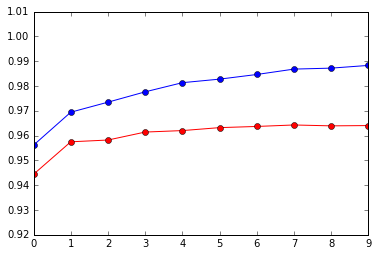

In [8]:
plt.figure(1)
plt.ylim(ymax = 1.01, ymin = 0.92)
plt.plot(range(len(T_ACCURACIES)), T_ACCURACIES, '-ob', label='Training')
plt.plot(range(len(V_ACCURACIES)), V_ACCURACIES, '-or', label='Validation')

In [9]:
ERROR_DF = DATA_VALID.reset_index()
ERROR_DF["prediction"] = classifier.predict(x=DATA_VALID.as_matrix())
ERROR_DF = ERROR_DF[(ERROR_DF.prediction != ERROR_DF.label)]
ERROR_DF.index = range(len(ERROR_DF))
print "Number of errors: \t ", len(ERROR_DF)

Number of errors: 	  302


In [10]:
ERROR_DF[["prediction", "label"]].head()

,prediction,label
0,3,9
1,8,9
2,8,3
3,6,4
4,5,8


In [11]:
def to_digit(df, idx, i=28, j=28):
    return df.iloc[idx,:].reshape((i, j))

def show_digit(digit):
    print "label: ", ERROR_DF.label[digit]
    print "predict: ", ERROR_DF.prediction[digit]
    plt.figure(2, figsize=(4, 4))
    plt.imshow(
        to_digit(ERROR_DF.drop(["prediction", "label"], axis=1), digit),
        cmap=plt.cm.gray_r, interpolation='nearest'
    )
    plt.show()

label:  5
predict:  9


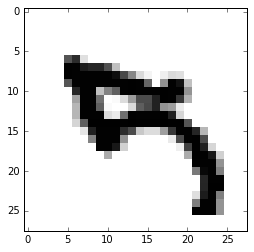

In [12]:
show_digit(5)

In [13]:
labels = classifier.predict(x=DATA_TEST.as_matrix())

In [14]:
df_result = pd.DataFrame({'ImageId': range(1, len(labels)+1), 'Label': labels})
df_result.to_csv('data/prediction_seven.csv', index=False)